In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [27]:
big5_sc = pd.read_csv('./big5_scored.csv')

In [28]:
big5_sc

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O6,O7,O8,O9,O10,E_SC,N_SC,A_SC,C_SC,O_SC
0,4,4,5,4,5,5,4,3,5,5,...,5,4,2,5,5,44,49,46,47,43
1,2,4,3,3,3,3,1,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,5,5,1,2,5,5,1,1,5,5,...,5,5,5,5,5,35,14,38,49,45
3,2,1,2,2,3,2,3,2,4,1,...,4,5,2,5,5,22,17,37,26,41
4,3,5,3,3,3,5,3,5,3,1,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,3,2,3,2,3,2,2,4,2,...,3,4,2,3,3,25,39,36,32,30
19716,2,1,4,1,5,1,1,4,1,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,2,2,3,2,2,1,3,4,1,...,5,5,3,5,5,21,20,38,43,42


In [29]:
C = big5_sc.loc[:, "C1":"C10"]

In [30]:
C.loc[:,"score"] = big5_sc.loc[:,"C_SC"]

C:\Users\ajou\AppData\Local\Temp\ipykernel_14760\3303134819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C.loc[:,"score"] = big5_sc.loc[:,"C_SC"]


In [31]:
C

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,score
0,4,5,5,5,5,5,4,5,4,5,47
1,4,5,3,4,3,5,5,5,4,4,42
2,4,5,5,5,5,5,5,5,5,5,49
3,3,3,4,1,1,2,5,2,2,3,26
4,3,5,5,3,3,5,1,3,3,3,34
...,...,...,...,...,...,...,...,...,...,...,...
19714,3,4,5,3,3,3,4,3,4,4,36
19715,3,3,4,4,2,2,4,4,3,3,32
19716,2,1,5,1,4,1,1,2,1,5,23
19717,5,3,5,4,4,4,5,5,3,5,43


In [32]:
categorys = []
for val in C['score']:
    if val < 30:
        category = 0
    else:
        category = 1
    categorys.append(category)
    
C['C'] = categorys

C:\Users\ajou\AppData\Local\Temp\ipykernel_14760\4143820691.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C['C'] = categorys


In [33]:
C

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,score,C
0,4,5,5,5,5,5,4,5,4,5,47,1
1,4,5,3,4,3,5,5,5,4,4,42,1
2,4,5,5,5,5,5,5,5,5,5,49,1
3,3,3,4,1,1,2,5,2,2,3,26,0
4,3,5,5,3,3,5,1,3,3,3,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19714,3,4,5,3,3,3,4,3,4,4,36,1
19715,3,3,4,4,2,2,4,4,3,3,32,1
19716,2,1,5,1,4,1,1,2,1,5,23,0
19717,5,3,5,4,4,4,5,5,3,5,43,1


In [34]:
C_train_X, C_train_y = C.iloc[:int(len(C.index)*0.8), :-2], C.iloc[:int(len(C.index)*0.8), -1]
C_test_X, C_test_y = C.iloc[int(len(C.index)*0.8):, :-2], C.iloc[int(len(C.index)*0.8):, -1]
C_test_X = C_test_X.reset_index(drop=True)

In [35]:
C_classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
C_classifier.fit(C_train_X, C_train_y)

C_train_score = C_classifier.score(C_train_X, C_train_y)
print(C_train_score)

C_score = C_classifier.score(C_test_X, C_test_y)
print(C_score)

0.9986687797147386
0.9586713995943205


In [36]:
C_train_y_pred = C_classifier.predict(C_train_X)
print('총 학습 개수 : %d, 오류개수 : %d' %(len(C_train_y), (C_train_y != C_train_y_pred).sum()))
print('정확도 : %.2f' %((len(C_train_y) - (C_train_y != C_train_y_pred).sum()) / len(C_train_y)))

총 학습 개수 : 15775, 오류개수 : 21
정확도 : 1.00


In [37]:
C_y_pred = C_classifier.predict(C_test_X)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(C_test_y), (C_test_y != C_y_pred).sum()))
print('정확도 : %.2f' %((len(C_test_y) - (C_test_y != C_y_pred).sum()) / len(C_test_y)))

총 테스트 개수 : 3944, 오류개수 : 163
정확도 : 0.96


feature ranking:
1. feature C6 (0.163)
2. feature C1 (0.134)
3. feature C5 (0.133)
4. feature C4 (0.111)
5. feature C9 (0.106)
6. feature C7 (0.103)
7. feature C2 (0.075)
8. feature C8 (0.060)
9. feature C10 (0.059)
10. feature C3 (0.056)


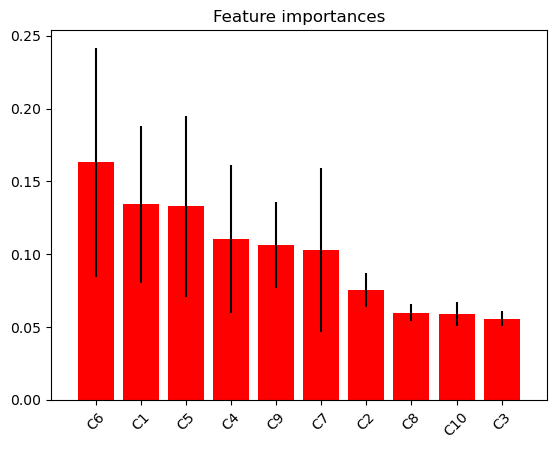

In [38]:
importances = C_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in C_classifier.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("feature ranking:")

for f in range(len(C_train_X.columns)):
    print("{}. feature {} ({:.3f})".format(f+1, C_train_X.columns[indices][f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(C_train_X.columns)), importances[indices],
       color = "r", yerr = std[indices], align = "center")
plt.xticks(range(len(C_train_X.columns)), C_train_X.columns[indices], rotation = 45)
plt.xlim([-1, len(C_train_X.columns)])
plt.show()

In [39]:
random.seed(0)
shuffled_scores = {}

for feature in C_train_X.columns:
    copy = C_train_X.copy()
    random.shuffle(copy.loc[:, feature])
    
    shuffled_score = C_classifier.score(copy, C_train_y)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

{'C1': 0.9458003169572108, 'C2': 0.9497939778129952, 'C3': 0.9608240887480191, 'C4': 0.9412361331220285, 'C5': 0.9456101426307448, 'C6': 0.9301426307448495, 'C7': 0.9519492868462758, 'C8': 0.9630427892234549, 'C9': 0.9441521394611727, 'C10': 0.9638668779714739}


In [40]:
print("Original Classfication Accuracy : %.4f"%C_train_score)
for n in range(len(C_train_X.columns)):
    print("%s high importance shuffled Accuracy : %.4f" %(n+1, shuffled_scores[C_train_X.columns[indices][n]]))

Original Classfication Accuracy : 0.9987
1 high importance shuffled Accuracy : 0.9301
2 high importance shuffled Accuracy : 0.9458
3 high importance shuffled Accuracy : 0.9456
4 high importance shuffled Accuracy : 0.9412
5 high importance shuffled Accuracy : 0.9442
6 high importance shuffled Accuracy : 0.9519
7 high importance shuffled Accuracy : 0.9498
8 high importance shuffled Accuracy : 0.9630
9 high importance shuffled Accuracy : 0.9639
10 high importance shuffled Accuracy : 0.9608


In [41]:
random.seed(0)
shuffled_scores = {}

for feature in C_test_X.columns:
    copy = C_test_X.copy()
    random.shuffle(copy.loc[:, feature])
    
    shuffled_score = C_classifier.score(copy, C_test_y)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

{'C1': 0.9234279918864098, 'C2': 0.927738336713996, 'C3': 0.9330628803245437, 'C4': 0.9224137931034483, 'C5': 0.9269776876267748, 'C6': 0.9099898580121704, 'C7': 0.9300202839756593, 'C8': 0.9320486815415822, 'C9': 0.9206389452332657, 'C10': 0.940922920892495}


In [42]:
print("Original Classfication Accuracy : %.4f"%C_score)
for n in range(len(C_train_X.columns)):
    print("%s high importance shuffled Accuracy : %.4f" %(n+1, shuffled_scores[C_train_X.columns[indices][n]]))

Original Classfication Accuracy : 0.9587
1 high importance shuffled Accuracy : 0.9100
2 high importance shuffled Accuracy : 0.9234
3 high importance shuffled Accuracy : 0.9270
4 high importance shuffled Accuracy : 0.9224
5 high importance shuffled Accuracy : 0.9206
6 high importance shuffled Accuracy : 0.9300
7 high importance shuffled Accuracy : 0.9277
8 high importance shuffled Accuracy : 0.9320
9 high importance shuffled Accuracy : 0.9409
10 high importance shuffled Accuracy : 0.9331


In [45]:
C2_se_train_X = C_train_X.copy()
C2_se_train_X = C2_se_train_X.loc[:, ["C6", "C1"]]

C2_se_test_X = C_test_X.copy()
C2_se_test_X = C2_se_test_X.loc[:, ["C6", "C1"]]
C2_se_test_X = C2_se_test_X.reset_index(drop=True)

C2_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
C2_se_classifier.fit(C2_se_train_X, C_train_y)

C2_se_score = C2_se_classifier.score(C2_se_train_X, C_train_y)
print(C2_se_score)

C2_se_test_score = C2_se_classifier.score(C2_se_test_X, C_test_y)
print(C2_se_test_score)

0.8374643423137876
0.8395030425963489


In [49]:
rf_param_grid = {
    'n_estimators' : [10, 50, 100],
    'max_depth' : [2, 4, 6, 8, 10],
}

C2_se_classifier = RandomForestClassifier()

C2_rf_grid = GridSearchCV(C2_se_classifier, param_grid= rf_param_grid, n_jobs = -1, verbose = 1)
C2_rf_grid.fit(C2_se_train_X, C_train_y)

print("Best accuracy : {0:.4f}".format(C2_rf_grid.best_score_))
print("Best hyperparameter : ", C2_rf_grid.best_params_)

C2_test_score = C2_rf_grid.score(C2_se_test_X, C_test_y)
print("Tset accuracy : {0:.4f}".format(C2_test_score))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best accuracy : 0.8375
Best hyperparameter :  {'max_depth': 6, 'n_estimators': 10}
Tset accuracy : 0.8395


In [63]:
scores_df = pd.DataFrame(C2_rf_grid.cv_results_)
scores_df.sort_values(by = ['rank_test_score'], inplace = True)
scores_df = scores_df[["params", "mean_test_score", "split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score"]]
print(scores_df)

                                    params  mean_test_score  \
6     {'max_depth': 6, 'n_estimators': 10}         0.837464   
7     {'max_depth': 6, 'n_estimators': 50}         0.837464   
8    {'max_depth': 6, 'n_estimators': 100}         0.837464   
9     {'max_depth': 8, 'n_estimators': 10}         0.837464   
10    {'max_depth': 8, 'n_estimators': 50}         0.837464   
11   {'max_depth': 8, 'n_estimators': 100}         0.837464   
12   {'max_depth': 10, 'n_estimators': 10}         0.837464   
13   {'max_depth': 10, 'n_estimators': 50}         0.837464   
14  {'max_depth': 10, 'n_estimators': 100}         0.837464   
3     {'max_depth': 4, 'n_estimators': 10}         0.837211   
4     {'max_depth': 4, 'n_estimators': 50}         0.836704   
5    {'max_depth': 4, 'n_estimators': 100}         0.836704   
1     {'max_depth': 2, 'n_estimators': 50}         0.829921   
2    {'max_depth': 2, 'n_estimators': 100}         0.828273   
0     {'max_depth': 2, 'n_estimators': 10}         0.82

In [20]:
C3_se_train_X = C_train_X.copy()
C3_se_train_X = C3_se_train_X.loc[:, ["C6", "C1","C5"]]

C3_se_test_X = C_test_X.copy()
C3_se_test_X = C3_se_test_X.loc[:, ["C6", "C1","C5"]]
C3_se_test_X = C3_se_test_X.reset_index(drop=True)

C3_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
C3_se_classifier.fit(C3_se_train_X, C_train_y)

C3_se_score = C3_se_classifier.score(C3_se_train_X, C_train_y)
print(C3_se_score)

C3_se_test_score = C3_se_classifier.score(C3_se_test_X, C_test_y)
print(C3_se_test_score)

0.8686529318541997
0.8729716024340771


In [51]:
rf_param_grid = {
    'n_estimators' : [10, 50, 100],
    'max_depth' : [2, 4, 6, 8, 10],
}

C3_se_classifier = RandomForestClassifier()

C3_rf_grid = GridSearchCV(C3_se_classifier, param_grid= rf_param_grid, n_jobs = -1, verbose = 1)
C3_rf_grid.fit(C3_se_train_X, C_train_y)

print("Best accuracy : {0:.4f}".format(C3_rf_grid.best_score_))
print("Best hyperparameter : ", C3_rf_grid.best_params_)

C3_test_score = C3_rf_grid.score(C3_se_test_X, C_test_y)
print("Tset accuracy : {0:.4f}".format(C3_test_score))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best accuracy : 0.8667
Best hyperparameter :  {'max_depth': 10, 'n_estimators': 10}
Tset accuracy : 0.8730


In [62]:
scores_df = pd.DataFrame(C3_rf_grid.cv_results_)
scores_df.sort_values(by = ['rank_test_score'], inplace = True)
scores_df = scores_df[["params", "mean_test_score", "split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score"]]
print(scores_df)

                                    params  mean_test_score  \
12   {'max_depth': 10, 'n_estimators': 10}         0.866688   
7     {'max_depth': 6, 'n_estimators': 50}         0.866561   
10    {'max_depth': 8, 'n_estimators': 50}         0.866181   
6     {'max_depth': 6, 'n_estimators': 10}         0.866054   
8    {'max_depth': 6, 'n_estimators': 100}         0.865927   
13   {'max_depth': 10, 'n_estimators': 50}         0.865864   
11   {'max_depth': 8, 'n_estimators': 100}         0.865800   
14  {'max_depth': 10, 'n_estimators': 100}         0.865610   
9     {'max_depth': 8, 'n_estimators': 10}         0.865547   
4     {'max_depth': 4, 'n_estimators': 50}         0.865483   
5    {'max_depth': 4, 'n_estimators': 100}         0.863899   
3     {'max_depth': 4, 'n_estimators': 10}         0.859905   
1     {'max_depth': 2, 'n_estimators': 50}         0.849635   
2    {'max_depth': 2, 'n_estimators': 100}         0.846339   
0     {'max_depth': 2, 'n_estimators': 10}         0.83

In [21]:
C4_se_train_X = C_train_X.copy()
C4_se_train_X = C4_se_train_X.loc[:, ["C6", "C1","C5","C4"]]

C4_se_test_X = C_test_X.copy()
C4_se_test_X = C4_se_test_X.loc[:, ["C6", "C1","C5","C4"]]
C4_se_test_X = C4_se_test_X.reset_index(drop=True)

C4_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
C4_se_classifier.fit(C4_se_train_X, C_train_y)

C4_se_score = C4_se_classifier.score(C4_se_train_X, C_train_y)
print(C4_se_score)

C4_se_test_score = C4_se_classifier.score(C4_se_test_X, C_test_y)
print(C4_se_test_score)

0.8898256735340729
0.8866632860040567


In [52]:
rf_param_grid = {
    'n_estimators' : [10, 50, 100],
    'max_depth' : [2, 4, 6, 8, 10],
}

C4_se_classifier = RandomForestClassifier()

C4_rf_grid = GridSearchCV(C4_se_classifier, param_grid= rf_param_grid, n_jobs = -1, verbose = 1)
C4_rf_grid.fit(C4_se_train_X, C_train_y)

print("Best accuracy : {0:.4f}".format(C4_rf_grid.best_score_))
print("Best hyperparameter : ", C4_rf_grid.best_params_)

C4_test_score = C4_rf_grid.score(C4_se_test_X, C_test_y)
print("Tset accuracy : {0:.4f}".format(C4_test_score))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best accuracy : 0.8824
Best hyperparameter :  {'max_depth': 8, 'n_estimators': 100}
Tset accuracy : 0.8874


In [64]:
scores_df = pd.DataFrame(C4_rf_grid.cv_results_)
scores_df.sort_values(by = ['rank_test_score'], inplace = True)
scores_df = scores_df[["params", "mean_test_score", "split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score"]]
print(scores_df)

                                    params  mean_test_score  \
11   {'max_depth': 8, 'n_estimators': 100}         0.882409   
10    {'max_depth': 8, 'n_estimators': 50}         0.882092   
8    {'max_depth': 6, 'n_estimators': 100}         0.881458   
9     {'max_depth': 8, 'n_estimators': 10}         0.881268   
13   {'max_depth': 10, 'n_estimators': 50}         0.881268   
7     {'max_depth': 6, 'n_estimators': 50}         0.881141   
14  {'max_depth': 10, 'n_estimators': 100}         0.880634   
12   {'max_depth': 10, 'n_estimators': 10}         0.879937   
6     {'max_depth': 6, 'n_estimators': 10}         0.879366   
4     {'max_depth': 4, 'n_estimators': 50}         0.875055   
5    {'max_depth': 4, 'n_estimators': 100}         0.872964   
3     {'max_depth': 4, 'n_estimators': 10}         0.870872   
1     {'max_depth': 2, 'n_estimators': 50}         0.860602   
2    {'max_depth': 2, 'n_estimators': 100}         0.852742   
0     {'max_depth': 2, 'n_estimators': 10}         0.85

In [23]:
C5_se_train_X = C_train_X.copy()
C5_se_train_X = C5_se_train_X.loc[:, ["C6", "C1","C5","C4","C9"]]

C5_se_test_X = C_test_X.copy()
C5_se_test_X = C5_se_test_X.loc[:, ["C6", "C1","C5","C4","C9"]]
C5_se_test_X = C5_se_test_X.reset_index(drop=True)

C5_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
C5_se_classifier.fit(C5_se_train_X, C_train_y)

C5_se_score = C5_se_classifier.score(C5_se_train_X, C_train_y)
print(C5_se_score)

C5_se_test_score = C5_se_classifier.score(C5_se_test_X, C_test_y)
print(C5_se_test_score)

0.92
0.9066937119675457


In [53]:
rf_param_grid = {
    'n_estimators' : [10, 50, 100],
    'max_depth' : [2, 4, 6, 8, 10],
}

C5_se_classifier = RandomForestClassifier()

C5_rf_grid = GridSearchCV(C5_se_classifier, param_grid= rf_param_grid, n_jobs = -1, verbose = 1)
C5_rf_grid.fit(C5_se_train_X, C_train_y)

print("Best accuracy : {0:.4f}".format(C5_rf_grid.best_score_))
print("Best hyperparameter : ", C5_rf_grid.best_params_)

C5_test_score = C5_rf_grid.score(C5_se_test_X, C_test_y)
print("Tset accuracy : {0:.4f}".format(C5_test_score))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best accuracy : 0.9222
Best hyperparameter :  {'max_depth': 8, 'n_estimators': 100}
Tset accuracy : 0.9275


In [65]:
scores_df = pd.DataFrame(C5_rf_grid.cv_results_)
scores_df.sort_values(by = ['rank_test_score'], inplace = True)
scores_df = scores_df[["params", "mean_test_score", "split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score"]]
print(scores_df)

                                    params  mean_test_score  \
11   {'max_depth': 8, 'n_estimators': 100}         0.922219   
14  {'max_depth': 10, 'n_estimators': 100}         0.922219   
13   {'max_depth': 10, 'n_estimators': 50}         0.921648   
10    {'max_depth': 8, 'n_estimators': 50}         0.921014   
9     {'max_depth': 8, 'n_estimators': 10}         0.919239   
12   {'max_depth': 10, 'n_estimators': 10}         0.916577   
7     {'max_depth': 6, 'n_estimators': 50}         0.914422   
8    {'max_depth': 6, 'n_estimators': 100}         0.914422   
6     {'max_depth': 6, 'n_estimators': 10}         0.910174   
5    {'max_depth': 4, 'n_estimators': 100}         0.906688   
4     {'max_depth': 4, 'n_estimators': 50}         0.905293   
3     {'max_depth': 4, 'n_estimators': 10}         0.899081   
2    {'max_depth': 2, 'n_estimators': 100}         0.875626   
1     {'max_depth': 2, 'n_estimators': 50}         0.874105   
0     {'max_depth': 2, 'n_estimators': 10}         0.86

In [71]:
C6_se_train_X = C_train_X.copy()
C6_se_train_X = C6_se_train_X.loc[:, ["C6", "C1","C5","C4","C9", "C7"]]

C6_se_test_X = C_test_X.copy()
C6_se_test_X = C6_se_test_X.loc[:, ["C6", "C1","C5","C4","C9", "C7"]]
C6_se_test_X = C6_se_test_X.reset_index(drop=True)

C6_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
C6_se_classifier.fit(C6_se_train_X, C_train_y)

C6_se_score = C6_se_classifier.score(C6_se_train_X, C_train_y)
print(C6_se_score)

C6_se_test_score = C6_se_classifier.score(C6_se_test_X, C_test_y)
print(C6_se_test_score)

0.948716323296355
0.9107505070993914


In [81]:
rf_param_grid = {
    'n_estimators' : [10, 25, 50, 100, 200, 500],
    'max_depth' : [2, 4, 6, 8, 10, 12],
}

C6_se_classifier = RandomForestClassifier()

C6_rf_grid = GridSearchCV(C6_se_classifier, param_grid= rf_param_grid, n_jobs = -1, verbose = 1)
C6_rf_grid.fit(C6_se_train_X, C_train_y)

print("Best accuracy : {0:.4f}".format(C6_rf_grid.best_score_))
print("Best hyperparameter : ", C6_rf_grid.best_params_)

C6_test_score = C6_rf_grid.score(C6_se_test_X, C_test_y)
print("Tset accuracy : {0:.4f}".format(C6_test_score))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best accuracy : 0.9134
Best hyperparameter :  {'max_depth': 8, 'n_estimators': 50}
Tset accuracy : 0.9191


In [82]:
scores_df = pd.DataFrame(C6_rf_grid.cv_results_)
scores_df.sort_values(by = ['rank_test_score'], inplace = True)
scores_df = scores_df[["params", "mean_test_score"]].head(10)
print(scores_df)

                                    params  mean_test_score
20    {'max_depth': 8, 'n_estimators': 50}         0.913407
23   {'max_depth': 8, 'n_estimators': 500}         0.913217
22   {'max_depth': 8, 'n_estimators': 200}         0.912647
21   {'max_depth': 8, 'n_estimators': 100}         0.912330
27  {'max_depth': 10, 'n_estimators': 100}         0.911379
29  {'max_depth': 10, 'n_estimators': 500}         0.911315
28  {'max_depth': 10, 'n_estimators': 200}         0.911062
26   {'max_depth': 10, 'n_estimators': 50}         0.910935
25   {'max_depth': 10, 'n_estimators': 25}         0.910808
19    {'max_depth': 8, 'n_estimators': 25}         0.910174


In [68]:
C7_se_train_X = C_train_X.copy()
C7_se_train_X = C7_se_train_X.loc[:, ["C6", "C1","C5","C4","C9", "C7", "C2"]]

C7_se_test_X = C_test_X.copy()
C7_se_test_X = C7_se_test_X.loc[:, ["C6", "C1","C5","C4","C9", "C7", "C2"]]
C7_se_test_X = C7_se_test_X.reset_index(drop=True)

C7_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
C7_se_classifier.fit(C7_se_train_X, C_train_y)

C7_se_score = C7_se_classifier.score(C7_se_train_X, C_train_y)
print(C7_se_score)

C7_se_test_score = C7_se_classifier.score(C7_se_test_X, C_test_y)
print(C7_se_test_score)

0.9715372424722662
0.9165821501014199


In [69]:
rf_param_grid = {
    'n_estimators' : [10, 50, 100],
    'max_depth' : [2, 4, 6, 8, 10],
}

C7_se_classifier = RandomForestClassifier()

C7_rf_grid = GridSearchCV(C7_se_classifier, param_grid= rf_param_grid, n_jobs = -1, verbose = 1)
C7_rf_grid.fit(C7_se_train_X, C_train_y)

print("Best accuracy : {0:.4f}".format(C7_rf_grid.best_score_))
print("Best hyperparameter : ", C7_rf_grid.best_params_)

C7_test_score = C7_rf_grid.score(C7_se_test_X, C_test_y)
print("Tset accuracy : {0:.4f}".format(C7_test_score))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best accuracy : 0.9229
Best hyperparameter :  {'max_depth': 10, 'n_estimators': 100}
Tset accuracy : 0.9260


In [70]:
scores_df = pd.DataFrame(C7_rf_grid.cv_results_)
scores_df.sort_values(by = ['rank_test_score'], inplace = True)
scores_df = scores_df[["params", "mean_test_score", "split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score"]]
print(scores_df)

                                    params  mean_test_score  \
14  {'max_depth': 10, 'n_estimators': 100}         0.922916   
13   {'max_depth': 10, 'n_estimators': 50}         0.921141   
10    {'max_depth': 8, 'n_estimators': 50}         0.920824   
11   {'max_depth': 8, 'n_estimators': 100}         0.920824   
9     {'max_depth': 8, 'n_estimators': 10}         0.919493   
12   {'max_depth': 10, 'n_estimators': 10}         0.918035   
8    {'max_depth': 6, 'n_estimators': 100}         0.915499   
7     {'max_depth': 6, 'n_estimators': 50}         0.914675   
6     {'max_depth': 6, 'n_estimators': 10}         0.912520   
4     {'max_depth': 4, 'n_estimators': 50}         0.905800   
5    {'max_depth': 4, 'n_estimators': 100}         0.904406   
3     {'max_depth': 4, 'n_estimators': 10}         0.896609   
2    {'max_depth': 2, 'n_estimators': 100}         0.876830   
1     {'max_depth': 2, 'n_estimators': 50}         0.870872   
0     {'max_depth': 2, 'n_estimators': 10}         0.86